# Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from linearmodels import PanelOLS

In [2]:
data = pd.read_csv('Assignment 2/sales.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'area1_sales', 'area2_sales', 'area3_sales',
       'total_sales'],
      dtype='object')

In [4]:
data = data.drop(columns = 'Unnamed: 0')

In [5]:
data

,area1_sales,area2_sales,area3_sales,total_sales
0,0.79,0.80,0.02,1.75
1,0.83,0.08,0.18,1.75
2,0.85,0.01,0.22,1.75
3,1.25,0.00,0.03,1.75
4,0.72,0.04,0.10,1.74
...,...,...,...,...
2995,0.20,0.00,0.07,0.49
2996,0.28,0.00,0.04,0.49
2997,0.00,0.49,0.00,0.49
2998,0.07,0.09,0.07,0.49


In [6]:
X=data[['area1_sales','area2_sales','area3_sales']]
Y=data['total_sales']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [7]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [8]:
Y_pred=lr.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
print("mae",mean_absolute_error(Y_test,Y_pred))
print("mse",mean_squared_error(Y_test,Y_pred))
print("r2",r2_score(Y_test,Y_pred))

mae 0.133422537948484
mse 0.0358793007243186
r2 0.7106047359376564


In [10]:
model = smf.ols('total_sales ~ area1_sales + area2_sales + area3_sales', data = data)
interactions1 = model.fit()
print(interactions1.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2354.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:00:59   Log-Likelihood:                 761.25
No. Observations:                3000   AIC:                            -1515.
Df Residuals:                    2996   BIC:                            -1490.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2601      0.008     30.743      

In [11]:
model = smf.ols('total_sales ~ area1_sales + area2_sales + area3_sales + area1_sales*area2_sales + area2_sales*area3_sales + area3_sales*area1_sales + area1_sales*area2_sales*area3_sales', data = data)
interactions1 = model.fit()
print(interactions1.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1075.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:01:03   Log-Likelihood:                 830.59
No. Observations:                3000   AIC:                            -1645.
Df Residuals:                    2992   BIC:                            -1597.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [12]:
# Getting rid of area2 and area3 interactions since it is insignificant

In [13]:
model1 = smf.ols('total_sales ~ area1_sales + area2_sales + area3_sales + area1_sales*area2_sales + area3_sales*area1_sales', data = data)
interactions1 = model1.fit()
print(interactions1.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     1489.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:01:06   Log-Likelihood:                 818.42
No. Observations:                3000   AIC:                            -1625.
Df Residuals:                    2994   BIC:                            -1589.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

# Question 2

In [14]:
logdata = pd.read_csv('Assignment 2/customer.csv')

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
logdata['Gender']=le.fit(logdata['Gender']).transform(logdata['Gender'])

In [16]:
logdata

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
X,Y = logdata[['Age', 'Gender', 'EstimatedSalary']], logdata['Purchased']

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [20]:
model = LogisticRegression()
model.fit(X_train, Y_train.values.ravel())
Y_predicted = model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(Y_test, Y_predicted))
confusion_matrix(Y_test, Y_predicted)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        59
           1       0.00      0.00      0.00        21

    accuracy                           0.74        80
   macro avg       0.37      0.50      0.42        80
weighted avg       0.54      0.74      0.63        80



/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[59,  0],
       [21,  0]])

In [22]:
accuracy = model.score(X_test, Y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  73.75 %


In [23]:
X,Y = logdata[['Age','Gender','EstimatedSalary']], logdata['Purchased']

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
model = LogisticRegression(solver = 'newton-cg')
model.fit(X_train, Y_train.values.ravel())
Y_predicted = model.predict(X_test)
print(classification_report(Y_test, Y_predicted))
confusion_matrix(Y_test, Y_predicted)
accuracy = model.score(X_test, Y_test)
print("accuracy = ", accuracy * 100, "%")

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        59
           1       0.78      0.86      0.82        21

    accuracy                           0.90        80
   macro avg       0.86      0.89      0.87        80
weighted avg       0.90      0.90      0.90        80

accuracy =  90.0 %


/opt/homebrew/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

In [25]:
formula = 'Purchased ~ Gender+Age+EstimatedSalary'

In [26]:
model_full = smf.glm(formula = formula, data = logdata, family = sm.families.Binomial())
model_full_result = model_full.fit()
print(model_full_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      396
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -137.92
Date:                Thu, 23 Feb 2023   Deviance:                       275.84
Time:                        20:01:34   Pearson chi2:                     459.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4590
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.7836      1.359     

In [27]:
formula = 'Purchased ~ Age+EstimatedSalary'

In [28]:
model = smf.glm(formula = formula, data = logdata, family = sm.families.Binomial())
model_result = model.fit()
print(model_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -138.53
Date:                Thu, 23 Feb 2023   Deviance:                       277.05
Time:                        20:01:36   Pearson chi2:                     467.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4574
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.4340      1.300     

In [29]:
formula = 'Purchased ~ Gender+EstimatedSalary'

In [30]:
model = smf.glm(formula = formula, data = logdata, family = sm.families.Binomial())
model_result = model.fit()
print(model_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -233.78
Date:                Thu, 23 Feb 2023   Deviance:                       467.56
Time:                        20:01:37   Pearson chi2:                     425.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1263
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2720      0.310     

In [31]:
formula = 'Purchased ~ Gender+Age'

In [32]:
model = smf.glm(formula = formula, data = logdata, family = sm.families.Binomial())
model_result = model.fit()
print(model_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -168.07
Date:                Thu, 23 Feb 2023   Deviance:                       336.14
Time:                        20:01:39   Pearson chi2:                     395.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3710
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.1154      0.814     -9.973      0.0

In [33]:
formula = 'Purchased ~ EstimatedSalary'

In [34]:
model = smf.glm(formula = formula, data = logdata, family = sm.families.Binomial())
model_result = model.fit()
print(model_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      398
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -233.86
Date:                Thu, 23 Feb 2023   Deviance:                       467.73
Time:                        20:01:40   Pearson chi2:                     426.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1259
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.3227      0.286     

In [35]:
formula = 'Purchased ~ Age'

In [36]:
model = smf.glm(formula = formula, data = logdata, family = sm.families.Binomial())
model_result = model.fit()
print(model_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      398
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -168.13
Date:                Thu, 23 Feb 2023   Deviance:                       336.26
Time:                        20:01:41   Pearson chi2:                     395.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3708
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.0441      0.784    -10.258      0.0

In [37]:
formula = 'Purchased ~ Gender'

In [38]:
model = smf.glm(formula = formula, data = logdata, family = sm.families.Binomial())
model_result = model.fit()
print(model_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      398
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -260.43
Date:                Thu, 23 Feb 2023   Deviance:                       520.85
Time:                        20:01:42   Pearson chi2:                     400.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.001803
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5004      0.144     -3.464      0.0

In [39]:
# Comparing the Pseudo R-squared of each model, we see that the full model has the highest Pseudo R-squared of 0.459

# Question 3

In [40]:
print(model_full_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      396
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -137.92
Date:                Thu, 23 Feb 2023   Deviance:                       275.84
Time:                        20:02:02   Pearson chi2:                     459.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4590
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.7836      1.359     

In [41]:
np.exp(model_full_result.params)

Intercept          0.000003
Gender             1.396324
Age                1.267402
EstimatedSalary    1.000036
dtype: float64

In [ ]:
"""
Interpretation of coefficients:

Holding everything constant except age, if age increases by 1 unit then the odds of purchasing will increase by 26%
Holding everything constant except gender, if gender increases by 1 unit then the odds of purchasing will increase by 39% but since gender is insignificant, this interpretation is also considered void
Holding everything constant except estimated salary, if estimated salary increases by 1 unit then the odds of purchasing will increase by almost negligible %, meaning it will have proportional increase wrt change in estimated salary

"""

# Question 4

In [43]:
sum(logdata['Purchased'] == 0)

257

In [ ]:
"""
Accuracy isn't the best metric in this case since there is class imbalance. The split in classes is 257 and 143 (approx 65%-35%)
Because of this, if the model predicts all instances to be negative, it will still have an accuracy of 65%, which is not a good representation of the model's ability to generalize.
Alternatives such as precision, recall or F-1 score should be considered.
"""

# Question 5

In [44]:
age = X['Age']

In [45]:
age.mean()

37.655

In [46]:
age.median()

37.0

In [47]:
age = [1 if a > 37 else 0 for a in age]

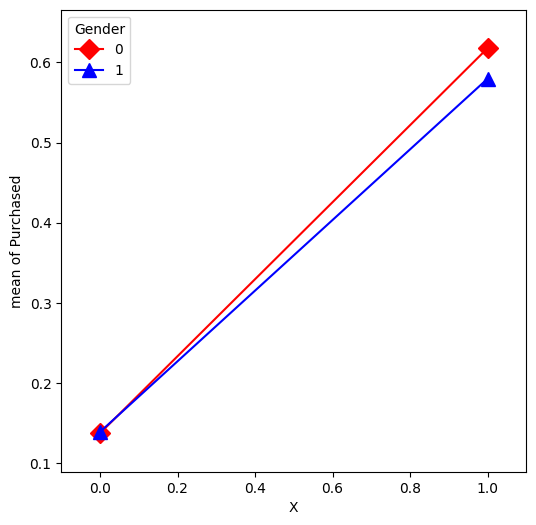

In [48]:
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=age,
    trace=X['Gender'],
    response=Y,
    colors=["red", "blue"],
    markers=["D", "^"],
    ms=10,
    ax=ax,
)

# Question 6

In [ ]:
"""
i. The interaction term should be included (but additional tests are required to determine interaction significance) in this plot since the slopes are not equal and the lines will eventually intersect if extended, which suggests there is a possibility of interaction between them.
ii. The interaction term should be included in this plot since the slopes are not equal and the lines even intersect, which suggests there is strong interaction between them.
iii. The interaction term is not needed in this plot since the slopes are equal, which suggests there is no interaction as increase in average savings changes likelihood of a house being purchased by the same factor for both income levels.
"""